# INTRODUCTION
- The purpose of this second study is to gain a better grasp of the problem in general, as well as to provide a stronger justification for the thesis concerning credit card fraud behaviour and the need of taking the proper methods from the start.    
- Credit card fraud detection is a difficult challenge that banks, and credit card issuers are attempting to solve by adopting fraud detection systems. In today's financial system, rule-based technologies are frequently used for fraud detection. However, the advancement and development of machine learning algorithms allows banks and financial organisations to recognise an unusual scenario faster for large financial data sets, as machine learning requires as many entries as possible to learn and predict with better accuracy.
- The following Dataset is available in: https://usmart.io/org/deloitte/discovery/discovery-view-detail/17881c8f-4fa2-4832-99ea-eb2f4033eac2

In [1]:
# Import necessary libraries for data preprocessing
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Let's read the second dataframe
df2 = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df2.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
# Read the last rows
df2.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [4]:
# Description of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# check for missing values
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

step  type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
Total     0.0   0.0     0.0       0.0            0.0             0.0   
Percent   0.0   0.0     0.0       0.0            0.0             0.0   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
Total         0.0             0.0             0.0      0.0             0.0  
Percent       0.0             0.0             0.0      0.0             0.0

In [6]:
# Identify the values for ==> type
df2["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
# Identify the values for ==> type
df2["isFraud"].unique()

array([0, 1], dtype=int64)

In [8]:
# Identify the values for ==> nameDest
df2["nameDest"].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [9]:
# Identify the values for ==> nameOrig
df2["nameOrig"].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

## DATA CONTENT
- This dataset contain 6362620 rows and 11 columns. From which we are goign to keep only the features with numeric values and relevant for our analysis.
- Step ==> Is the our when the transaction was made, this is from 1 to 743, which represents 31 days cosidered for the data collection 24 hours each day.
- type ==> Is referinf to the type of transaction made: 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
- Amount ==> The maoun of the Transaction
- nameOrig ==> Is refering to the origen of the transaction, is a unic alphanumeric code asigned to each transaction.
- nameDest ==> Is refering to the Destination of the transaction, is a unic alphanumeric code asigned to each transaction.
- oldbalanceOrg ==> Represents the balance of the sender before made the transaction.
- newbalanceOrig ==> Represents the balance of the sender after made the transaction.
- newbalanceDest ==> Represents the balance of the receiber after made the transaction.
- oldbalanceDest==> Represents the balance of the receiber before made the transaction.
- isFrau | isFlaggedFraud ==> Represent the same value.

### Comments 
- On the first stage we are goign to drop the column "isFlaggedFraud", because contains the same value as the column "isFraud", sine that is our target variable, it's important to avoid duplicate data.

In [10]:
# Drop a column with duplicate values
df2 = df2.drop("isFlaggedFraud", axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [11]:
# Reading the columns
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
# Explore data types
df2.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

### Comments 
- If the first characters of nameOrig and nameDest are relevant, we will try to isolate them.

In [13]:
#Identify similarities between features to avoid over-fitting.
def returnFirstChar(name):
    return name[0]

df2['nameOrigF'] = df2['nameOrig'].apply(returnFirstChar)
df2['nameDestF'] = df2['nameDest'].apply(returnFirstChar)

In [14]:
# Droping the columns we don't need in our analysis 
df2 = df2.drop(columns=['nameOrig','nameDest','nameOrigF'])
# Let's update changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   nameDestF       object 
dtypes: float64(5), int64(2), object(2)
memory usage: 436.9+ MB


# LABEL ENCODER
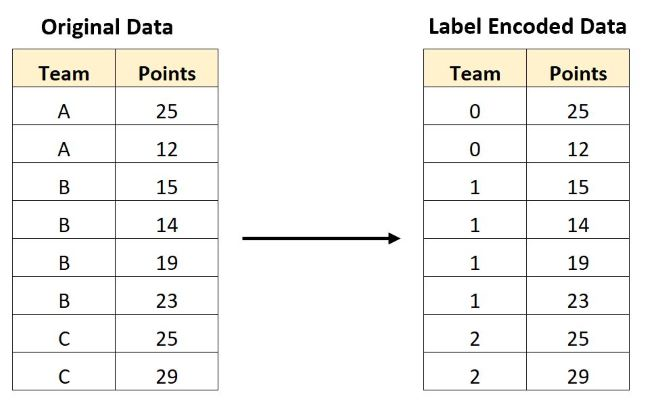

### Comments 
- Label encoding is useful for transforming categorical data into numerical format.

In [15]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for column in ['type', 'nameDestF']:
    encoder = LabelEncoder()
    df2[column] = encoder.fit_transform(df2[column])
    # Update data types
df2.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
nameDestF           int32
dtype: object

In [16]:
# let's convert all data to dtype == int64
df2 = df2.astype('int64')
df2.dtypes

step              int64
type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
dtype: object

In [17]:
# Define constants
hours_in_day = 24

# Convert "step" values to days and hours
df2['days'] = (df2['step'] - 1) // hours_in_day + 1
df2['hours'] = (df2['step'] - 1) % hours_in_day

# Dropping the column transformed
df2 = df2.drop("step", axis=1)

# Now the 'days' column will contain the day of the month and the 'hours' column will contain the hour within that day,
print(df2[['days', 'hours']])
df2.dtypes

         days  hours
0           1      0
1           1      0
2           1      0
3           1      0
4           1      0
...       ...    ...
6362615    31     22
6362616    31     22
6362617    31     22
6362618    31     22
6362619    31     22

[6362620 rows x 2 columns]


type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
days              int64
hours             int64
dtype: object

In [18]:
# Call the first rows
df2.head()

type  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3    9839         170136          160296               0   
1     3    1864          21249           19384               0   
2     4     181            181               0               0   
3     1     181            181               0           21182   
4     3   11668          41554           29885               0   

   newbalanceDest  isFraud  nameDestF  days  hours  
0               0        0          1     1      0  
1               0        0          1     1      0  
2               0        1          0     1      0  
3               0        1          0     1      0  
4               0        0          1     1      0

In [19]:
# Import necessary libraries for evaluation and visualisation
from scipy import stats
from scipy.stats import norm, skew
from collections import Counter

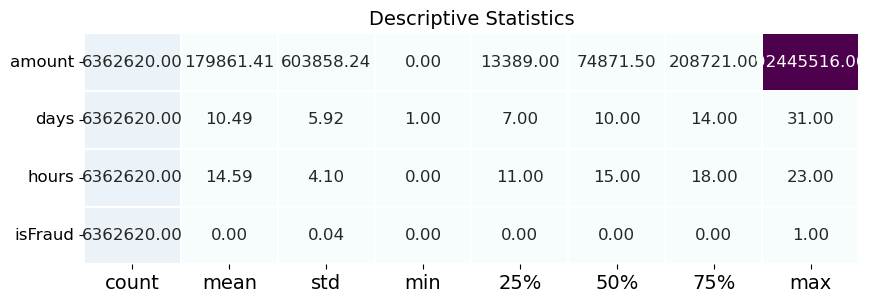

In [20]:
# statistical summary:
cols = df2[["amount","days","hours","isFraud"]]
cmap1 = 'BuPu'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [21]:
# correlation matrix
corr = df2.corr()
corr.style.background_gradient(cmap='BuPu')

### Comments 
- Based on the correlation matrix the column hour represents a negative correlation, however in the previous analysis we could identify that hour, is a relevant feature for credit card fraud detenction, for this reason we are not going to drop columns untill we have a better insight of the values. 
- The columns oldbalanceOr with newbalanceOrig, and also oldbalanceDest with newbalanceDest represent high correlation features are more likely to be linearly related and have virtually the same influence on the dependent variable. As a result, when two characteristics have a strong correlation, we can drop one of them. The correlation heatmap of the original dataset and resampled dataset. 

In [22]:
# Drop columns with high correlation
df2 = df2.drop(columns=['newbalanceOrig','oldbalanceDest','nameDestF'])
# Let's update changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype
---  ------          -----
 0   type            int64
 1   amount          int64
 2   oldbalanceOrg   int64
 3   newbalanceDest  int64
 4   isFraud         int64
 5   days            int64
 6   hours           int64
dtypes: int64(7)
memory usage: 339.8 MB


# DATA VISUALISATION

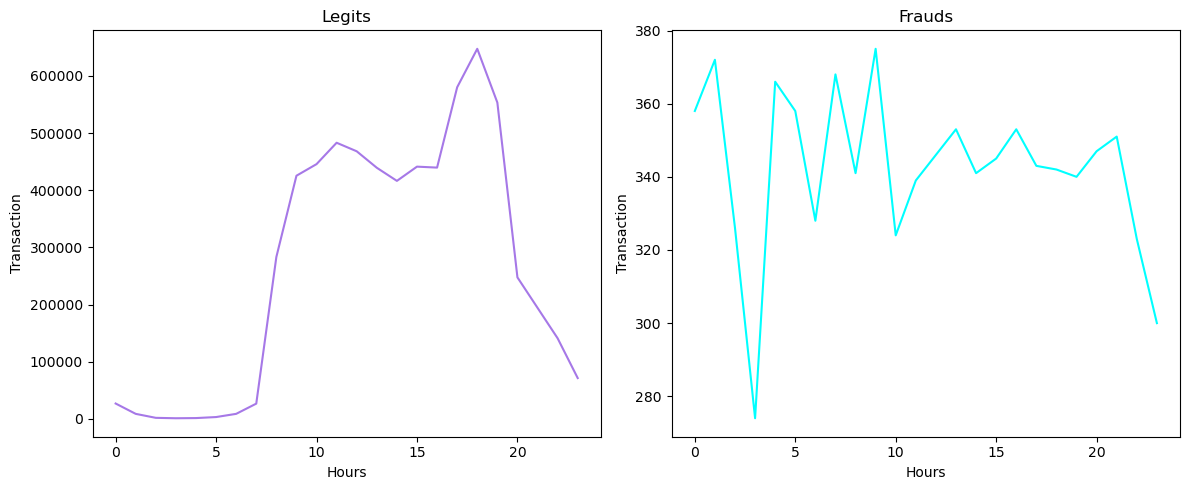

In [23]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('hours').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('hours').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
ax1.plot(count_0.index, count_0.values, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Transaction")

# Plot for Frauds
ax2.plot(count_1.index, count_1.values, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Hours")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

### Comments
- As it presented previously in the correlation matrix, the plot shows similiarity, which means that hour is not really related with fraudalent transactions, could be for many reasons, and one them might be that it's a transformed feature, so we don't have the 100% of confidence that those transactions we exactly at that time.

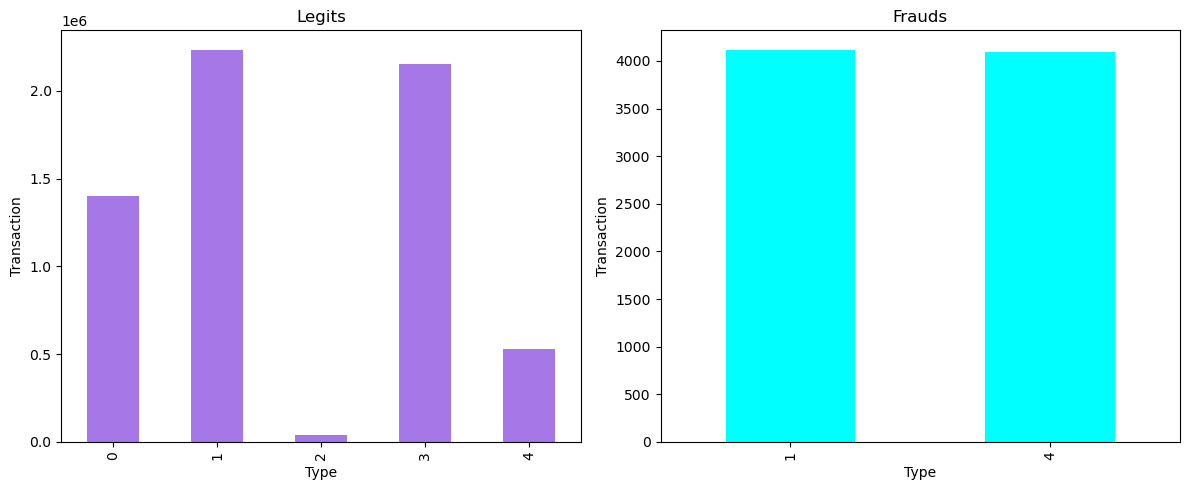

In [24]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('type').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('type').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
count_0.plot(kind='bar', ax=ax1, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Type")
ax1.set_ylabel("Transaction")

# Plot for Frauds
count_1.plot(kind='bar', ax=ax2, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Type")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

### Comments 
- Int this graphic we can visualise an important value to detect fraud transactions, according to type column the fraud transactions are only present in the values 1 and 4 which means, TRANSFER and CASH_IN, which could be an import value to consider for oversampling.

- How much of the data are cases of fraud?

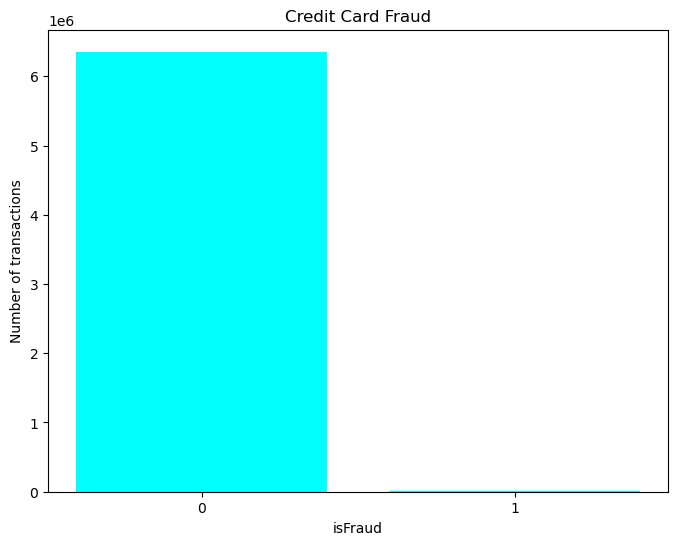

In [25]:
# Calculate class distribution
temp = df2["isFraud"].value_counts()
df_p = pd.DataFrame({'isFraud': temp.index, 'values': temp.values})

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_p['isFraud'], df_p['values'], color="#00FFFF")
plt.title('Credit Card Fraud')
plt.xlabel('isFraud')
plt.ylabel('Number of transactions')
plt.xticks(df_p['isFraud'])
plt.show()

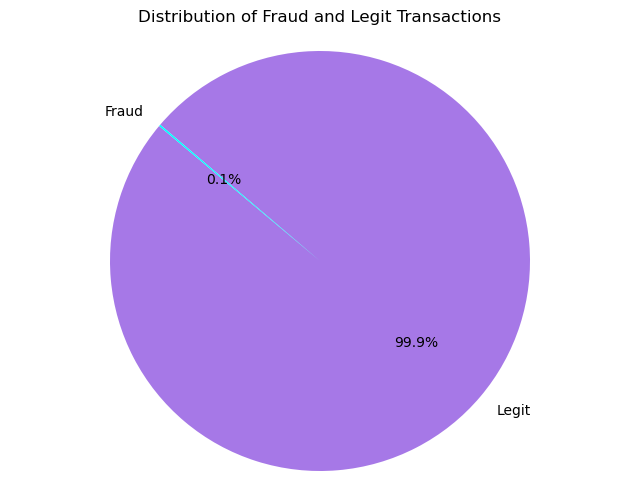

In [26]:
# Calculate the distribution of fraud and legit transactions
fraud_count = len(df2[df2['isFraud'] == 1])
legit_count = len(df2[df2['isFraud'] == 0])
counts = [legit_count, fraud_count]
labels = ['Legit', 'Fraud']
colors = ['#A678E7', '#00FFFF']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud and Legit Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# DATA PROCESSING

In [27]:
# Import necessary libraries for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [28]:
features = df2.drop('isFraud', axis=1)
labels = df2['isFraud']

In [29]:
Counter(df2['isFraud'])

Counter({0: 6354407, 1: 8213})

In [30]:
"Minority class imbalance: ", 8213 / 6354407

('Minority class imbalance: ', 0.0012924888191769902)

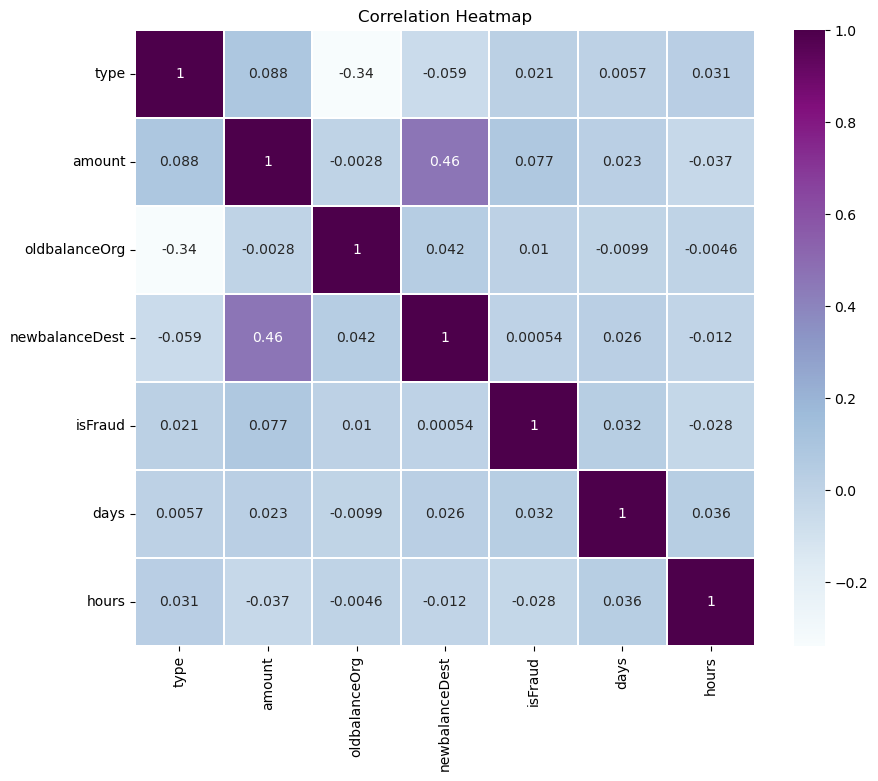

In [31]:
# correlation heatmap:
corr = df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="BuPu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Comments 
- The heatmap does not offer much information because it is a large dataset, which is why we used feature selection to assist in choosing the key characteristics. When there are many unnecessary features contributing no more helpful information than the current subset of variables, feature selection is one of the important stages in data preprocessing. It is known as a path to capture relevant features for use in the implementation of the machine learning model to expedite the training period, improve learning interpretability, and decrease model over-fitting. The dataset's excessive and verbose information may have a significant impact on the performance of our model.


Text(0.5, 1.0, 'Correlation between features')

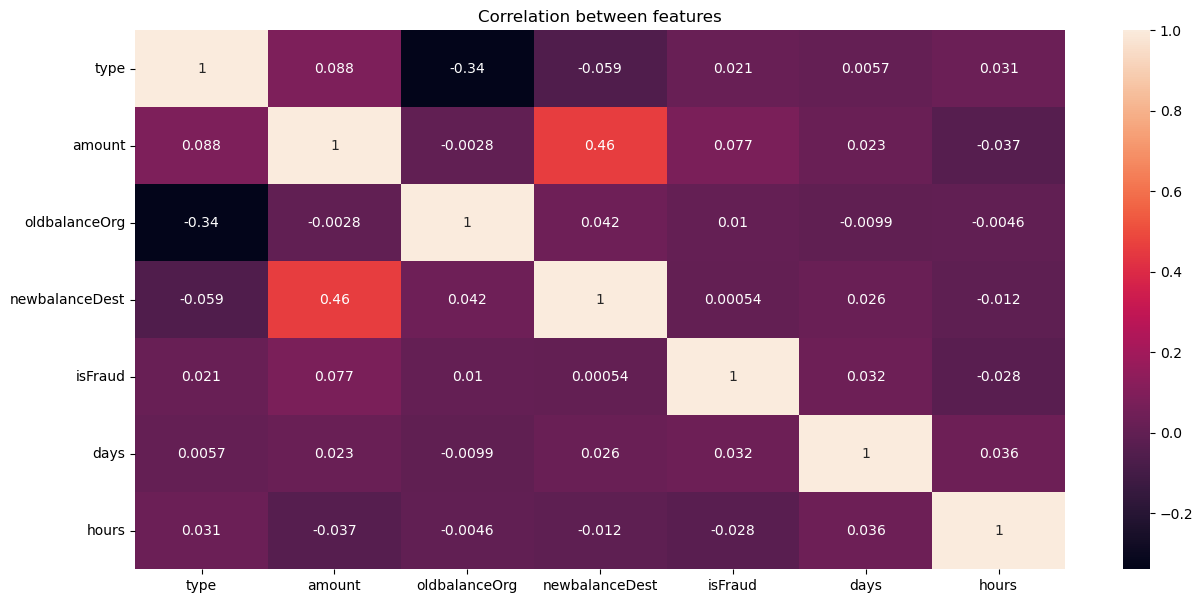

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation between features")

# Undersampling to handle class imbalance


In [35]:
# Import necessary libraries for modeling and testing
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

print("Number samples X_train dataset: ", X_train.shape)
print("Number samples y_train dataset: ", y_train.shape)
print("Number samples X_test dataset: ", X_test.shape)
print("Number samples y_test dataset: ", y_test.shape)

Number samples X_train dataset:  (4453834, 6)
Number samples y_train dataset:  (4453834,)
Number samples X_test dataset:  (1908786, 6)
Number samples y_test dataset:  (1908786,)


In [37]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=10)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before Undersampling, counts of label '1': 5794
Before Undersampling, counts of label '0': 4448040 

After Undersampling, the shape of train_X: (11588, 6)
After Undersampling, the shape of train_y: (11588,) 

After Undersampling, counts of label '1': 5794
After Undersampling, counts of label '0': 5794


Text(0.5, 1.0, 'Correlation between synthetically created samples')

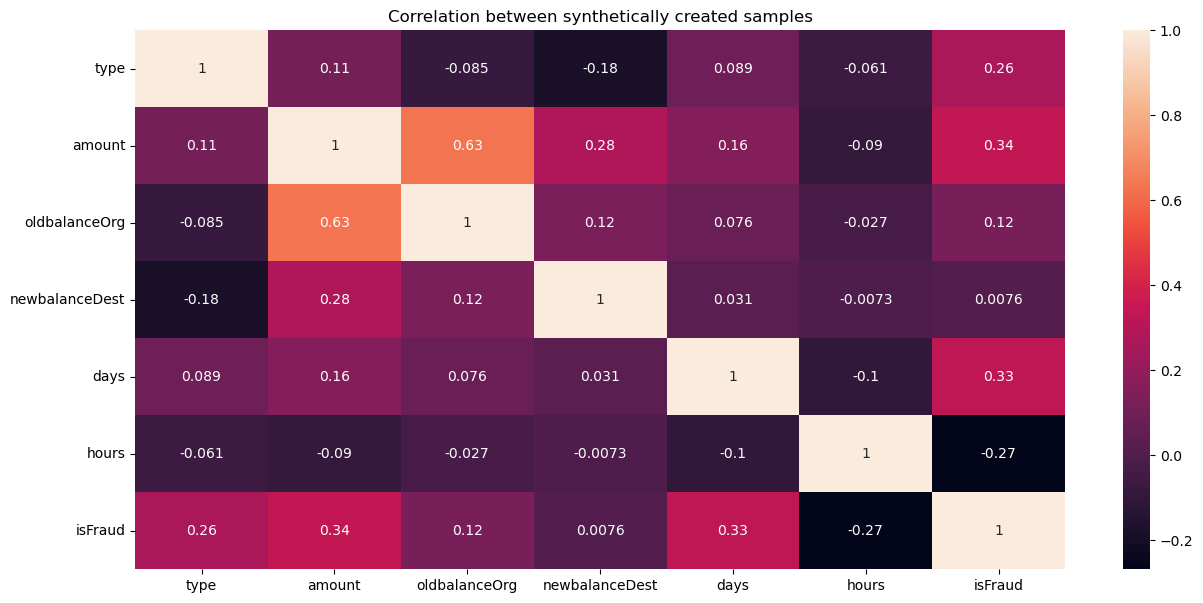

In [38]:
plt.figure(figsize=(15,7))
tdf = pd.DataFrame(X_train_res, columns=df2.drop('isFraud', axis = 1).columns)
tdf['isFraud'] = y_train_res
sns.heatmap(tdf.corr(), annot=True)
plt.title("Correlation between synthetically created samples")

### Comments
- We now have class balance for the minority class through the creation of artificial training samples. The correlation between the features did not change too much, for this reason we are goign to keep all the columns, sinde we tested already applying lasso and the model did not improve. 

# MODEL CREATION

- Define Classifiers 
- Split Data
- Create Results DataFrame

In [44]:
# Import necessary libraries for modeling and testing
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

In [45]:
# Define a list of classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier())
]

# Split the data into training and testing sets
X_train_res, X_test, y_train_res, y_test = train_test_split(tdf.drop('isFraud', axis=1), tdf['isFraud'], test_size=0.2, random_state=0)

# Create a DataFrame to store the results
results = []

In [46]:
print("X_train shape:", X_train_res.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train_res.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9270, 6)
X_test shape: (2318, 6)
y_train shape: (9270,)
y_test shape: (2318,)


Classifier: Random Forest
Accuracy: 0.9827437446074202
F1 Score: 0.9833472106577851
AUC-ROC: 0.9985920647307371
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1119
           1       0.98      0.98      0.98      1199

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



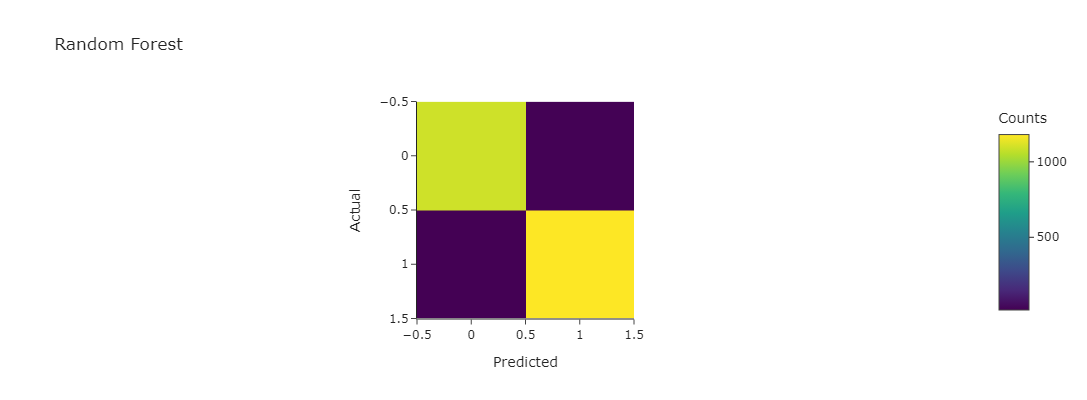

Classifier: Gradient Boosting
Accuracy: 0.9775668679896462
F1 Score: 0.978405315614618
AUC-ROC: 0.9973652455389918
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1119
           1       0.97      0.98      0.98      1199

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



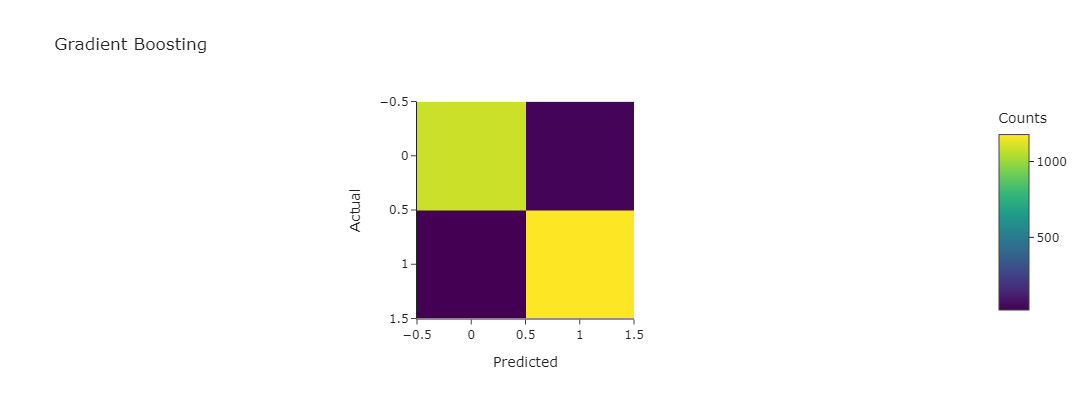

Classifier: AdaBoost
Accuracy: 0.9503882657463331
F1 Score: 0.9516196886832141
AUC-ROC: 0.992871256282231
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1119
           1       0.96      0.94      0.95      1199

    accuracy                           0.95      2318
   macro avg       0.95      0.95      0.95      2318
weighted avg       0.95      0.95      0.95      2318



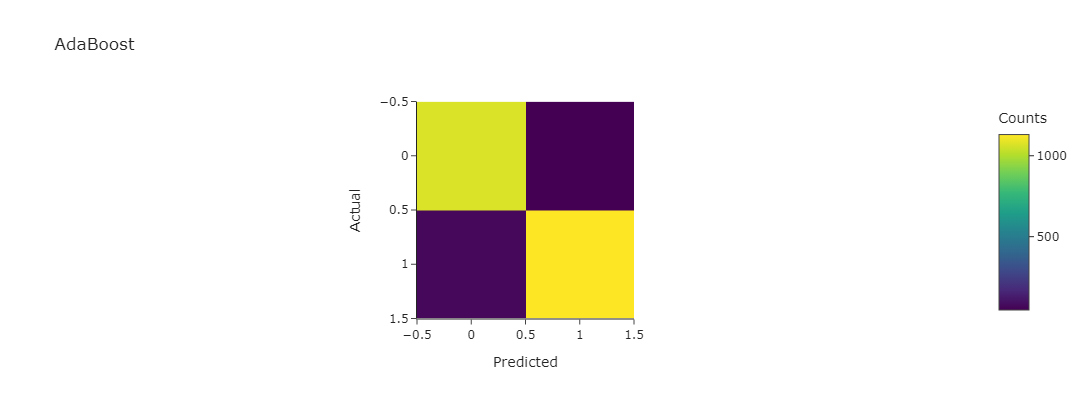

Classifier: Logistic Regression
Accuracy: 0.6773080241587576
F1 Score: 0.7448840381991814
AUC-ROC: 0.8374196250822662
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56      1119
           1       0.63      0.91      0.74      1199

    accuracy                           0.68      2318
   macro avg       0.72      0.67      0.65      2318
weighted avg       0.72      0.68      0.66      2318



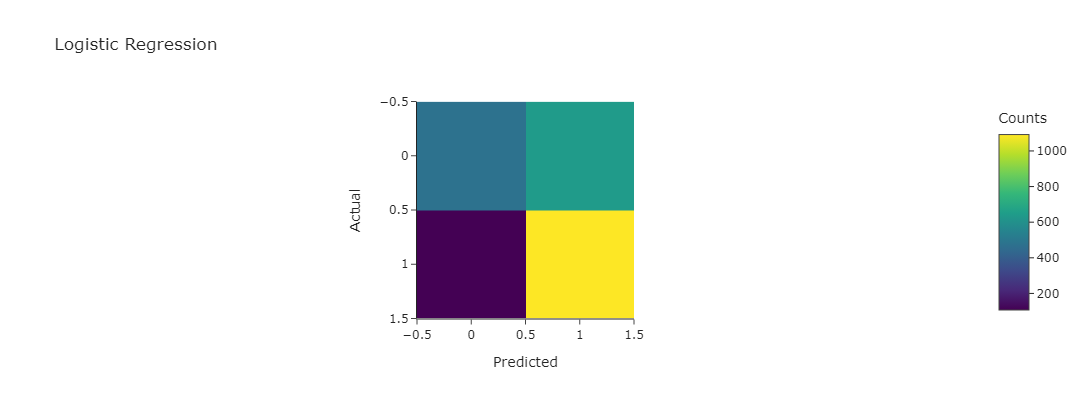

Classifier: SVM
Accuracy: 0.769197584124245
F1 Score: 0.7302067574382249
AUC-ROC: 0.859869820024283
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1119
           1       0.92      0.60      0.73      1199

    accuracy                           0.77      2318
   macro avg       0.81      0.78      0.76      2318
weighted avg       0.81      0.77      0.76      2318



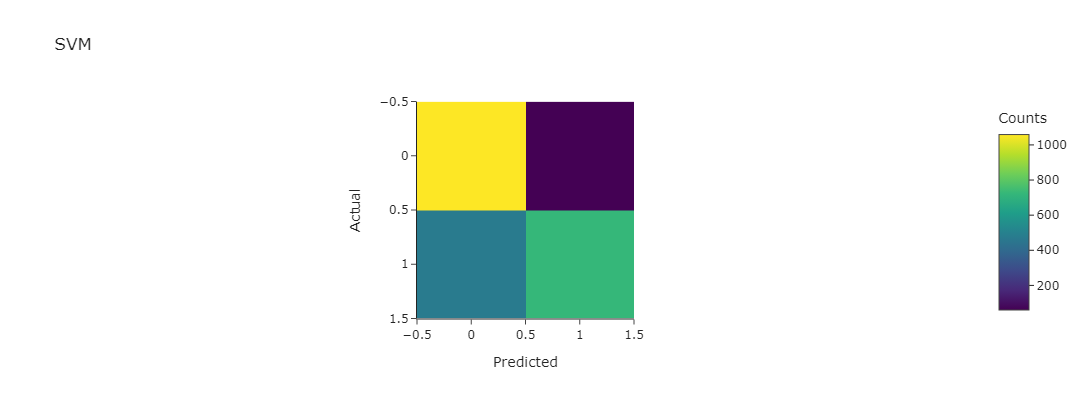

Classifier: KNN
Accuracy: 0.9516824849007766
F1 Score: 0.9539094650205762
AUC-ROC: 0.9828722326693156
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1119
           1       0.94      0.97      0.95      1199

    accuracy                           0.95      2318
   macro avg       0.95      0.95      0.95      2318
weighted avg       0.95      0.95      0.95      2318



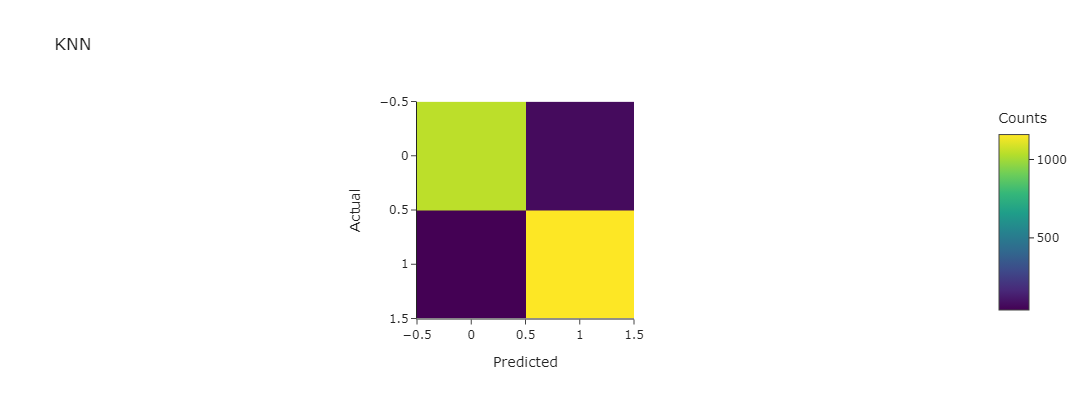

Classifier: Naive Bayes
Accuracy: 0.6005176876617774
F1 Score: 0.4124365482233502
AUC-ROC: 0.7527422688403578
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1119
           1       0.86      0.27      0.41      1199

    accuracy                           0.60      2318
   macro avg       0.71      0.61      0.55      2318
weighted avg       0.71      0.60      0.55      2318



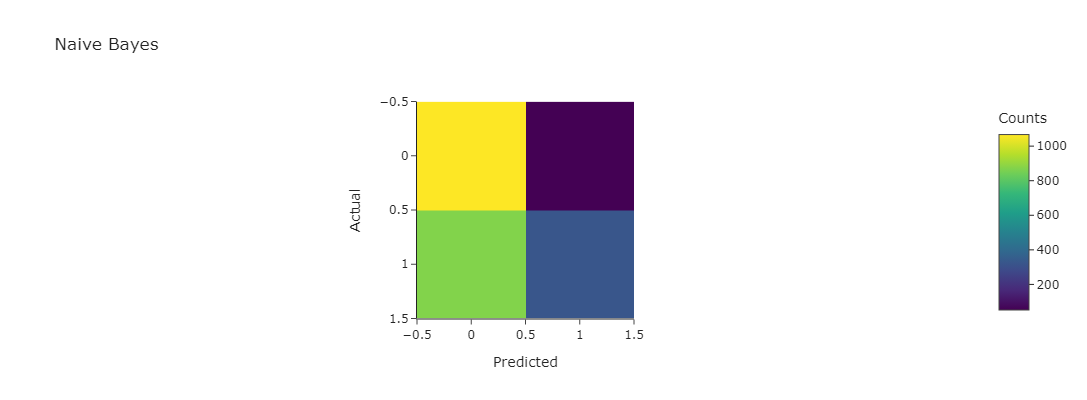

Classifier: Decision Tree
Accuracy: 0.9754098360655737
F1 Score: 0.9762202753441802
AUC-ROC: 0.9753954181359055
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1119
           1       0.98      0.98      0.98      1199

    accuracy                           0.98      2318
   macro avg       0.98      0.98      0.98      2318
weighted avg       0.98      0.98      0.98      2318



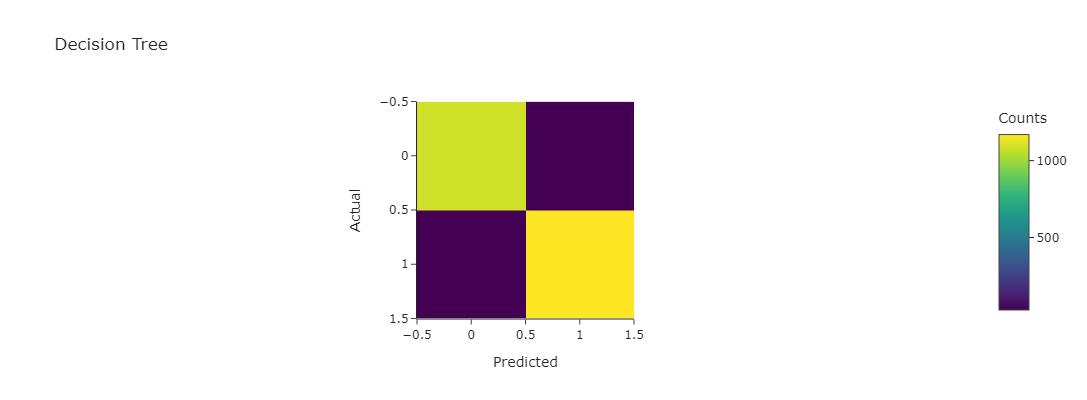

Classifier: XGBoost
Accuracy: 0.9883520276100086
F1 Score: 0.9887733887733888
AUC-ROC: 0.9989714395597762
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1119
           1       0.99      0.99      0.99      1199

    accuracy                           0.99      2318
   macro avg       0.99      0.99      0.99      2318
weighted avg       0.99      0.99      0.99      2318



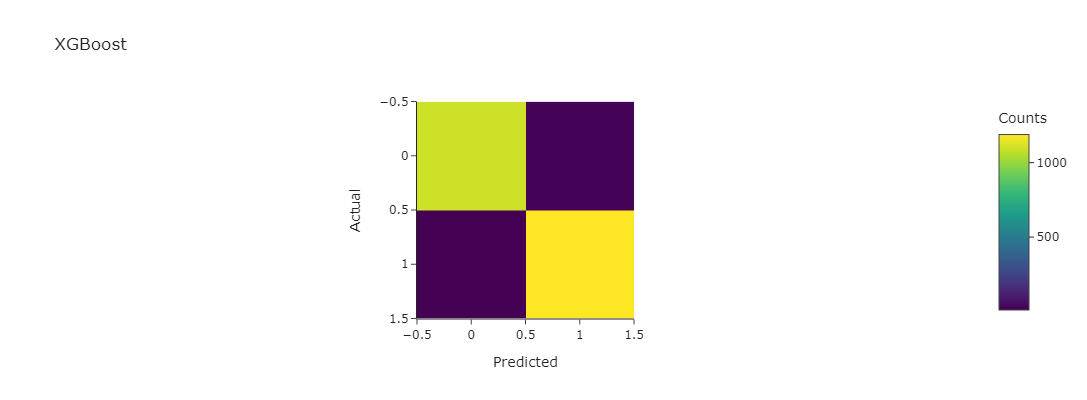

[LightGBM] [Info] Number of positive: 4595, number of negative: 4675
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 9270, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495685 -> initscore=-0.017260
[LightGBM] [Info] Start training from score -0.017260
Classifier: LightGBM
Accuracy: 0.9883520276100086
F1 Score: 0.9888013272501037
AUC-ROC: 0.9984828733506698
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1119
           1       0.98      0.99      0.99      1199

    accuracy                           0.99      2318
   macro avg       0.99      0.99      0.99      2318
weighted avg       0.99      0.99      0.9

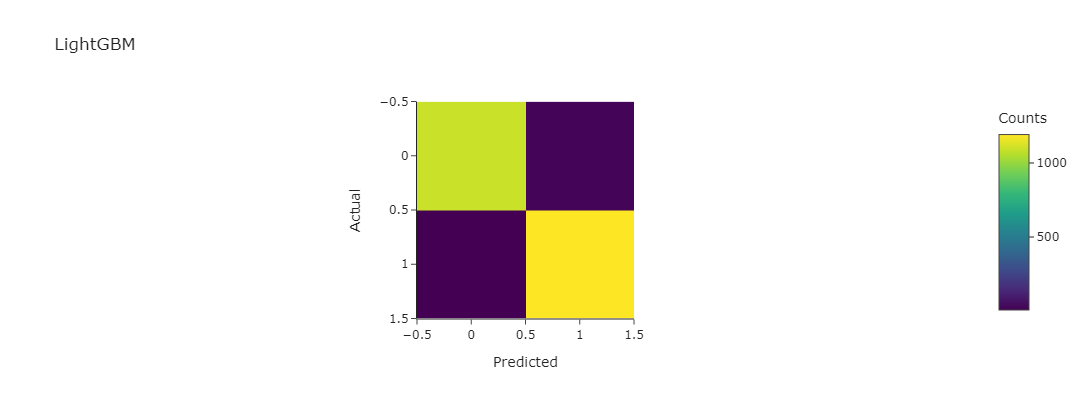

In [47]:
# Iterate over classifiers
for name, clf in classifiers:
    clf.fit(X_train_res, y_train_res)  
    y_pred = clf.predict(X_test)  
    
    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve and AUC
    if hasattr(clf, "predict_proba"):
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None
    
    # Create a classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print classification report
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {roc_auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)
    
    # Append results to the DataFrame
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC-ROC": roc_auc,
        "Class 0 Precision": report['0']['precision'],
        "Class 0 Recall": report['0']['recall'],
        "Class 1 Precision": report['1']['precision'],
        "Class 1 Recall": report['1']['recall']
    })
    
    # Modify this line to set the correct title
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=name,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="simple_white")
    fig.show()

# Iterate Over Classifiers and Calculate Metrics

# Visualize Comparative Metrics

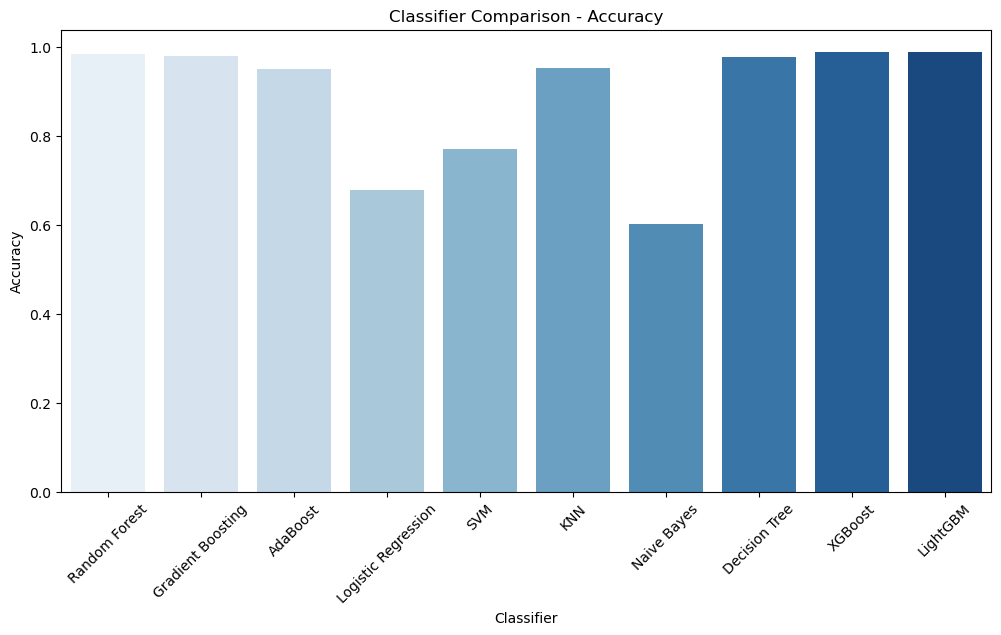

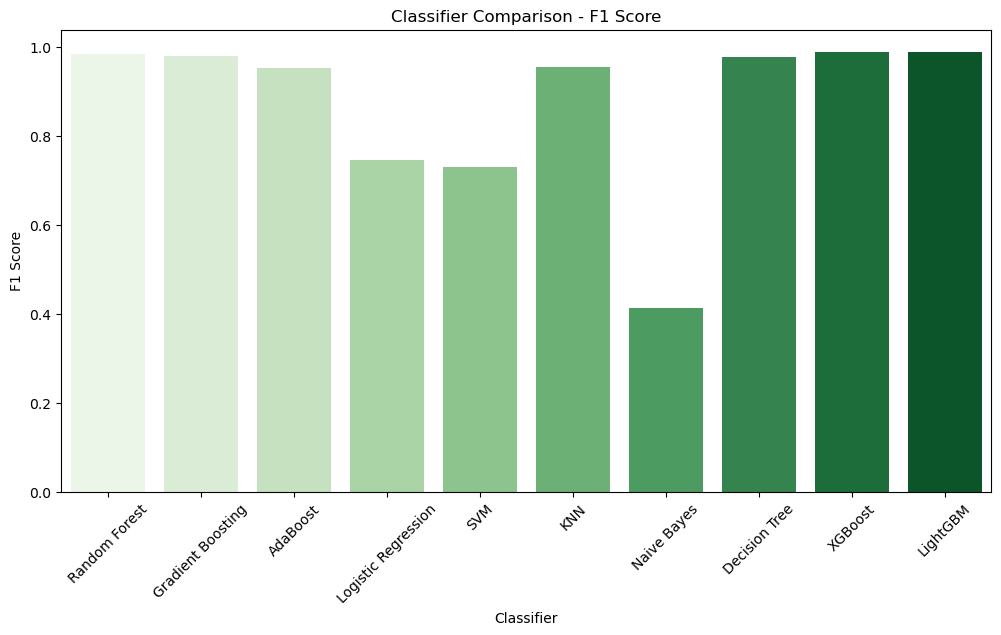

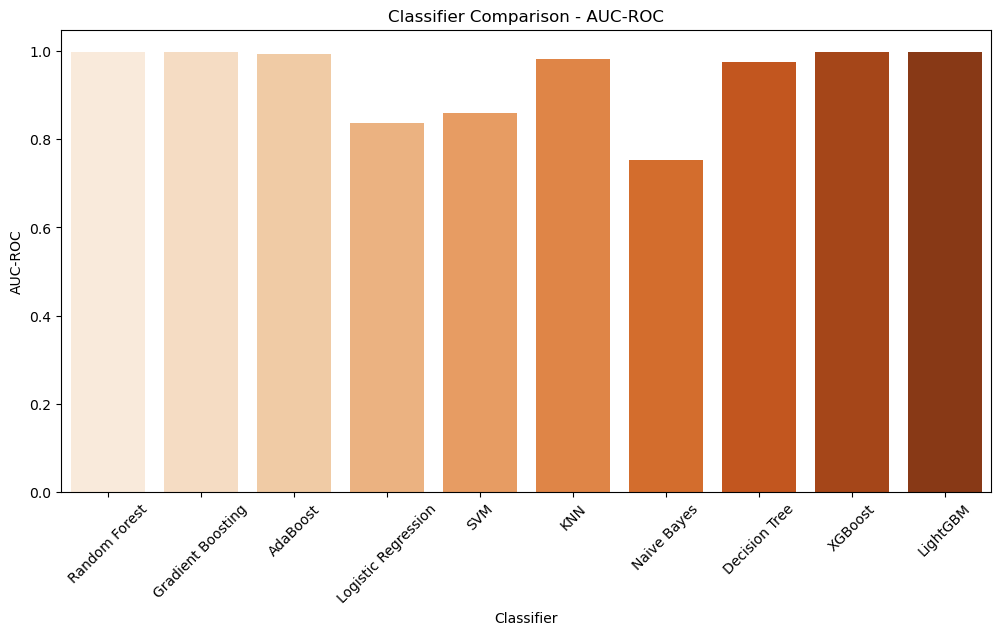

In [48]:
# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot comparative metrics
plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="Accuracy", data=results_df, palette="Blues")
plt.title("Classifier Comparison - Accuracy")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="F1 Score", data=results_df, palette="Greens")
plt.title("Classifier Comparison - F1 Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="AUC-ROC", data=results_df, palette="Oranges")
plt.title("Classifier Comparison - AUC-ROC")
plt.xticks(rotation=45)
plt.show()

- Random Forest has performed exceptionally well, with an accuracy of 98.27% and an F1 score of 98.33%. The high accuracy indicates that it effectively separates the two classes in the dataset. The AUC-ROC score of 99.86% suggests that it has an excellent ability to distinguish between positive and negative cases.

- Gradient Boosting achieved an accuracy of 97.76% and an F1 score of 97.84%. This indicates strong predictive power and the ability to generalize well to unseen data. The AUC-ROC score of 99.74% demonstrates its robustness in classification.

- AdaBoost it still achieves a respectable accuracy of 95.04% and an F1 score of 95.16%. The AUC-ROC score of 99.29% indicates good discriminatory power.

- Logistic Regression in this case, it shows a lower accuracy of 67.73% and an F1 score of 74.49%. This suggests that it may not capture the complex relationships in the data as effectively as other models. The AUC-ROC score of 83.74% is decent but lower compared to ensemble methods.

- SVM it achieves a reasonable accuracy of 76.92% and an F1 score of 73.02%. The AUC-ROC score of 85.99% indicates good separability of classes.

- KNN it performs well with an accuracy of 95.17% and an F1 score of 95.39%. The AUC-ROC score of 98.29% demonstrates its effectiveness in distinguishing between classes.

- Naive Bayes it shows the lowest accuracy of 60.05% and an F1 score of 41.24%. This suggests that the independence assumption might not hold well in this dataset. The AUC-ROC score of 75.27% indicates some ability to discriminate between classes.

- Decision Tree it performs well with an accuracy of 97.54% and an F1 score of 97.62%. The AUC-ROC score of 97.54% aligns with its strong classification performance.

- XGBoost it excels with an accuracy of 98.84% and an F1 score of 98.88%. The AUC-ROC score of 99.90% indicates its superior ability to rank positive samples.

- LightGBM it performs similarly to XGBoost, with an accuracy of 98.84% and an F1 score of 98.88%. The AUC-ROC score of 99.85% underscores its classification prowess.

## CONCLUSION
Random Forest, Gradient Boosting, XGBoost, and LightGBM are top-performing classifiers, while Logistic Regression and Naive Bayes fall behind in this dataset. These results provide valuable insights into the strengths and weaknesses of each model.
It is important to note that oversampling was considered as well, but the performance was even lower than undersampling, and the complexity and time to process were increased too much due to the expanded samples, because the dataset was originally large with that approach was too much, for that also the LASSO technique was applied in order to minimise the complexity, however the results were better using undersampling without LASSO. 